<a href="https://colab.research.google.com/github/Manu-Anand/tf_certfication/blob/master/stroke_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import files
#uploaded = files.upload()

**Install Dependancies below. **
1. pip install -U imbalanced-learn (For SMOTE related libraries)
2. Uses seaborn libraries to plot

In [0]:
#imports required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import math 
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as pltp
from sklearn.metrics import average_precision_score
from sklearn.metrics import average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from collections import Counter
from imblearn.pipeline import Pipeline
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from pandas.plotting import parallel_coordinates

Reads training data from csv file

In [0]:
stroke_data = pd.read_csv('train_2v.csv')

Describes the dataframe. 
1. Rows with null values are seen for 'bmi' and 'smoking_status'
2. Nulls for bmi has been filled with mean of data
3. Nulls/Nans against 'smoking_status' handled by remoning the rows.
4. Class count is displayed in plot 
5. Inference - the data has imbalanced labels - 97% positive classes.

Train columns with null values:
 id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64
Train columns with bmi values:
 id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64
Train n id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0


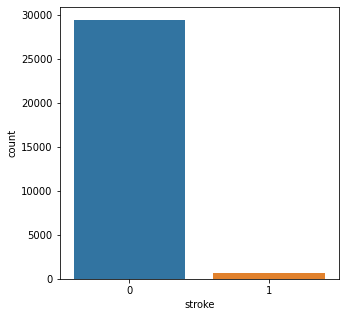

In [739]:
stroke_data.describe(include = 'all')
# The below code shows there are many null values
print('Train columns with null values:\n', stroke_data.isnull().sum())

stroke_data['bmi'].fillna((stroke_data['bmi'].mean()), inplace=True)
print('Train columns with bmi values:\n', stroke_data.isnull().sum())
stroke_data = stroke_data.dropna()
print('Train n', stroke_data.isnull().sum())
class_count = stroke_data.stroke.value_counts()
stroke_data = stroke_data.reset_index()
print(class_count)
# The below code shows that  the data has class imbalance problem
# The data is unbalanced
rcParams['figure.figsize'] = 5, 5
class_count = stroke_data.stroke.value_counts()
print('class count', class_count)
ax = sns.countplot(x="stroke", data=stroke_data)

Trainig data is stored in pandas dataframe - 'stroke_data' and uses LabelEncoder to encode categorical variables.

In [740]:
# Smoking status got many Nan Values. So Drops them. Recheck other alternatives
stroke_data = stroke_data[stroke_data['smoking_status'].notna()]
label_encoding("work_type")
label_encoding("Residence_type")
label_encoding("ever_married")
label_encoding("gender")
label_encoding("smoking_status")
label_names = [0, 1]
stroke_data.head(2)

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
1,3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0


1. Split the data as features and Labels (X and y)
2. Normalize the data 

In [741]:
stroke_data_x = stroke_data.drop('stroke', axis=1)
stroke_data_y = stroke_data['stroke']
print(stroke_data_y.value_counts())
#Normalize the data
stroke_data_x = (stroke_data_x - stroke_data_x.min())/(stroke_data_x.max() - stroke_data_x.min())
stroke_data_x.drop(['work_type','Residence_type'], axis=1, inplace=True)
print(stroke_data_x)
# Remove below line of code if you dont need val dataset
stroke_data_x, x_val, stroke_data_y, y_val = train_test_split(stroke_data_x, stroke_data_y, test_size=0.1, random_state=0, stratify=stroke_data_y)
print(x_val)

0    29470
1      638
Name: stroke, dtype: int64
          index        id  gender  ...  avg_glucose_level       bmi  smoking_status
0      0.000000  0.417688     0.5  ...           0.139595  0.355311             0.5
1      0.000046  0.775164     0.0  ...           0.059439  0.315018             0.0
2      0.000115  0.723849     0.0  ...           0.095662  0.092796             0.0
3      0.000138  0.567739     0.0  ...           0.798678  0.206349             0.5
4      0.000161  0.209276     0.0  ...           0.096001  0.271062             1.0
...         ...       ...     ...  ...                ...       ...             ...
30103  0.999908  0.770407     0.0  ...           0.015379  0.125763             0.5
30104  0.999931  0.074703     0.0  ...           0.671920  0.553114             0.0
30105  0.999954  0.388994     0.0  ...           0.156457  0.229548             0.0
30106  0.999977  0.383483     0.5  ...           0.187045  0.282051             0.5
30107  1.000000  0.497244  

1. Define a Random Forest classifier in a method

In [0]:
def classify_RandomForestClassifier(estimators): 
  rf_classifier = RandomForestClassifier(n_estimators = estimators, random_state = 0)
  rf_classifier.fit(x_train, y_train)
  return rf_classifier

1. Displayes correlation amongs features
2. Inference - There is no correlation except for age and ever_married(approx0.4)

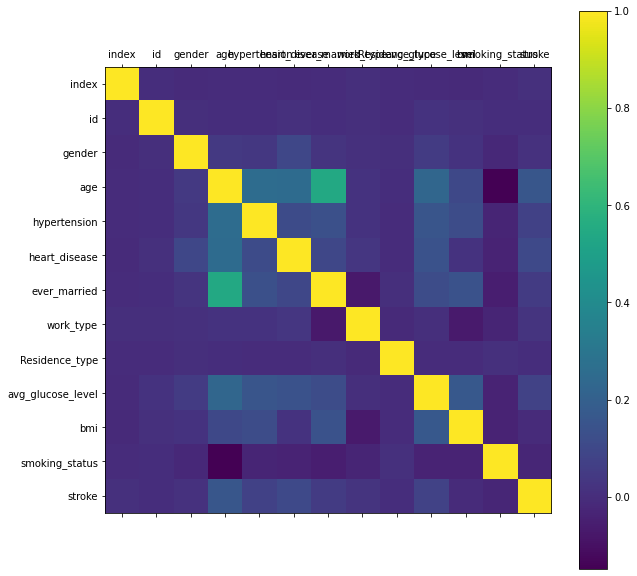

In [743]:
# Displays correlation metrics
# Inference - Age and marriage has some correlation. All other fileds shows very less correlation
rcParams['figure.figsize'] = 10, 10
plt.matshow(stroke_data.corr())
plt.yticks(np.arange(stroke_data.shape[1]), stroke_data.columns)
plt.xticks(np.arange(stroke_data.shape[1]), stroke_data.columns)
plt.colorbar()

1. Displays a count plot of 'bmi' against stoke class

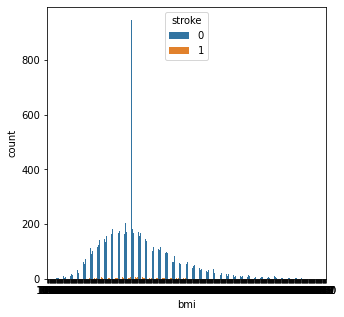

In [744]:

rcParams['figure.figsize'] = 5, 5
ax = sns.countplot(x="bmi", data=stroke_data, hue="stroke")


In [0]:
def best_features():
  bestfeatures = SelectKBest(score_func=chi2, k=7)
  fit = bestfeatures.fit(stroke_data_x,stroke_data_y)
  scores = pd.DataFrame(fit.scores_)
  columns = pd.DataFrame(x.columns)
  #concat two dataframes for better visualization 
  featureScores = pd.concat([columns,scores],axis=1)
  featureScores.columns = ['Specs','Score']  #naming the dataframe columns
  print(featureScores.nlargest(10,'Score'))  #print 10 best features

In [746]:
# Split the data into predictors and target
x_train, x_test, y_train, y_test = train_test_split(stroke_data_x, stroke_data_y, test_size=0.2, random_state=0, stratify=stroke_data_y)
#x_test_not_used,x_val,y_test_not_used,y_val = train_test_split(x_test, y_test, test_size=0.9, random_state=0, stratify=y_test)
class_count = y_train.value_counts()
print(class_count)
class_count = y_test.value_counts()
print(class_count)

0    21218
1      459
Name: stroke, dtype: int64
0    5305
1     115
Name: stroke, dtype: int64


               Specs       Score
5      heart_disease  254.226279
4       hypertension  115.962250
3                age   89.956659
7          work_type   25.998416
6       ever_married   20.063589
9  avg_glucose_level    3.449518
2             gender    0.913066
0              index    0.412164
1                 id    0.056096
8     Residence_type    0.045341
0.9787822878228782
Confusion Matrics:  [[5305    0]
 [ 115    0]]
Classification Report               precision    recall  f1-score   support

           0       0.98      1.00      0.99      5305
           1       0.00      0.00      0.00       115

    accuracy                           0.98      5420
   macro avg       0.49      0.50      0.49      5420
weighted avg       0.96      0.98      0.97      5420



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Text(0.5, 1.0, '2-class Precision-Recall curve')

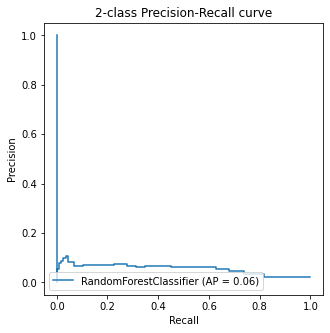

In [747]:
# Invoke RF Classifier
best_features()
estimators = 100
rf_classifier = classify_RandomForestClassifier(estimators)
print(rf_classifier.score(x_test, y_test))
y_test_pred = rf_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)
#plot_classfier(estimators)
print('Confusion Matrics: ', cm)
print('Classification Report', classification_report(y_test, y_test_pred))

#y_score = rf_classifier.decision_function(X_test)
#average_precision = average_precision_score(y_test, y_score)
#print('Average precision-recall score: {0:0.2f}'.format(
      #average_precision))
disp = plot_precision_recall_curve(rf_classifier, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

               Specs       Score
5      heart_disease  254.226279
4       hypertension  115.962250
3                age   89.956659
7          work_type   25.998416
6       ever_married   20.063589
9  avg_glucose_level    3.449518
2             gender    0.913066
0              index    0.412164
1                 id    0.056096
8     Residence_type    0.045341
0.94127030162413
Confusion Matrics:  [[5190  115]
 [ 290 1301]]
Classification Report               precision    recall  f1-score   support

           0       0.95      0.98      0.96      5305
           1       0.92      0.82      0.87      1591

    accuracy                           0.94      6896
   macro avg       0.93      0.90      0.91      6896
weighted avg       0.94      0.94      0.94      6896



Text(0.5, 1.0, '2-class Precision-Recall curve')

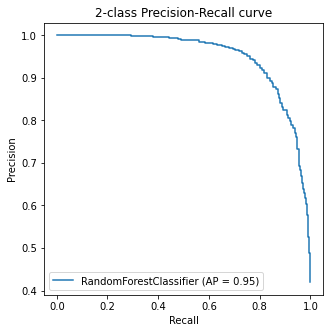

In [748]:
smote_stroke_y= stroke_data_y
smote_stroke_x = stroke_data_x
#Oversmaple the minority class 10% of major class
over_sample = SMOTE(sampling_strategy=0.2)

# Undersample the majority class 50% 
under_sample = RandomUnderSampler(sampling_strategy=0.3)
steps = [('o', over_sample), ('u', under_sample)]
# Add this to pipeline
pipeline = Pipeline(steps=steps)
best_features()
smote_stroke_x, smote_stroke_y = pipeline.fit_resample(smote_stroke_x, smote_stroke_y)


x_train, x_test, y_train, y_test = train_test_split(smote_stroke_x, smote_stroke_y, test_size=0.3, random_state=0, stratify=smote_stroke_y)
estimators = 100
rf_classifier = classify_RandomForestClassifier(estimators)
print(rf_classifier.score(x_test, y_test))
y_test_pred = rf_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)
#plot_classfier(estimators)
print('Confusion Matrics: ', cm)
print('Classification Report', classification_report(y_test, y_test_pred))

disp = plot_precision_recall_curve(rf_classifier, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

               Specs       Score
5      heart_disease  254.226279
4       hypertension  115.962250
3                age   89.956659
7          work_type   25.998416
6       ever_married   20.063589
9  avg_glucose_level    3.449518
2             gender    0.913066
0              index    0.412164
1                 id    0.056096
8     Residence_type    0.045341
0.8734813573523251
Confusion Matrics:  [[1436  155]
 [ 147  649]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.90      0.90      1591
           1       0.81      0.82      0.81       796

    accuracy                           0.87      2387
   macro avg       0.86      0.86      0.86      2387
weighted avg       0.87      0.87      0.87      2387



Text(0.5, 1.0, '2-class Precision-Recall curve')

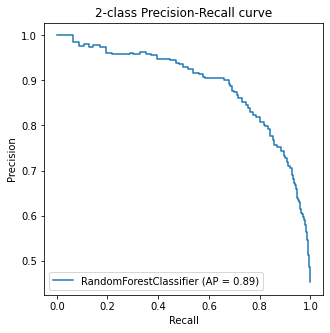

In [749]:
smote_stroke_y= stroke_data_y
smote_stroke_x = stroke_data_x
best_features()
#smote_stroke_x.drop(['work_type','Residence_type'], axis=1, inplace=True)
#Oversmaple the minority class 10% of major class
over_sample = SMOTE(sampling_strategy=0.1)

# Undersample the majority class 50% 
under_sample = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over_sample), ('u', under_sample)]
# Add this to pipeline
pipeline = Pipeline(steps=steps)

smote_stroke_x, smote_stroke_y = pipeline.fit_resample(smote_stroke_x, smote_stroke_y)


x_train, x_test, y_train, y_test = train_test_split(smote_stroke_x, smote_stroke_y, test_size=0.3, random_state=0, stratify=smote_stroke_y)
#x_test,x_val,y_test,y_val = train_test_split(x_test, y_test, test_size=0.1, random_state=0, stratify=y_test)
estimators = 100
rf_classifier = classify_RandomForestClassifier(estimators)
print(rf_classifier.score(x_test, y_test))
y_test_pred = rf_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)
#plot_classfier(estimators)
print('Confusion Matrics: ', cm)
print('Classification Report', classification_report(y_test, y_test_pred))

disp = plot_precision_recall_curve(rf_classifier, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

Confusion Matrics:  [[2664  283]
 [  33   31]]
Classification Report               precision    recall  f1-score   support

           0       0.99      0.90      0.94      2947
           1       0.10      0.48      0.16        64

    accuracy                           0.90      3011
   macro avg       0.54      0.69      0.55      3011
weighted avg       0.97      0.90      0.93      3011



Text(0.5, 1.0, '2-class Precision-Recall curve')

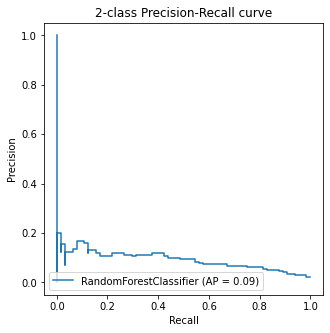

In [750]:
y_val_pred = rf_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_val_pred)
#plot_classfier(estimators)
print('Confusion Matrics: ', cm)
print('Classification Report', classification_report(y_val, y_val_pred))

disp = plot_precision_recall_curve(rf_classifier, x_val, y_val)
disp.ax_.set_title('2-class Precision-Recall curve')

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      7958
           1       0.05      0.68      0.10       172

    accuracy                           0.74      8130
   macro avg       0.52      0.71      0.47      8130
weighted avg       0.97      0.74      0.83      8130

              precision    recall  f1-score   support

           0       0.98      0.45      0.62      7958
           1       0.03      0.67      0.05       172

    accuracy                           0.45      8130
   macro avg       0.50      0.56      0.33      8130
weighted avg       0.96      0.45      0.61      8130

              precision    recall  f1-score   support

           0       0.99      0.46      0.62      2947
           1       0.03      0.80      0.06        64

    accuracy                           0.46      3011
   macro avg       0.51      0.63      0.34      3011
weighted avg       0.97      0.46      0.61      3011



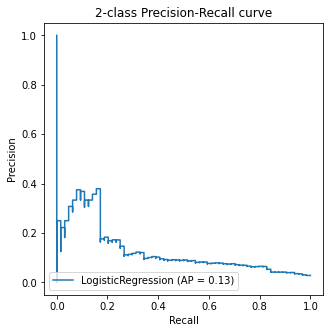

In [753]:
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 

x_train, x_test, y_train, y_test = train_test_split(stroke_data_x, stroke_data_y, test_size=0.3, random_state=0, stratify=stroke_data_y)
lr1 = LogisticRegression() 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(x_train, y_train) 
lr1.fit(X_train_res, y_train_res.ravel()) 

predictions = lr1.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, predictions))
disp = plot_precision_recall_curve(lr1, x_val, y_val)
disp.ax_.set_title('2-class Precision-Recall curve')


from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
X_train_miss, y_train_miss = nr.fit_sample(x_train, y_train) 
lr2 = LogisticRegression() 
lr2.fit(X_train_miss, y_train_miss.ravel()) 
predictions = lr2.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

predictions = lr2.predict(x_val) 

print(classification_report(y_val, predictions))

